In [ ]:
################## CANH TAY ROBOT BAC 2########

In [ ]:
# load library
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.callbacks import EarlyStopping

In [ ]:
# upload file csv
data=pd.read_csv("/content/robot_2bac.csv")
data.head()

,thelta1,thelta2,Px,Py
0,0.0,0.00,80.000000,0.000000
1,0.0,1.20,73.623578,9.320391
2,0.3,0.50,73.840621,27.859975
3,-0.1,0.75,77.611130,-0.936475
4,1.1,-0.80,41.305093,65.339717


In [ ]:
#tao data x y
data_x=data.drop(['thelta1','thelta2'],axis=1)
print(data_x.shape)
data_y=data[['thelta1','thelta2']]
print(data_y.shape)
data_y
data_x

(278, 2)
(278, 2)


,Px,Py
0,80.000000,0.000000
1,73.623578,9.320391
2,73.840621,27.859975
3,77.611130,-0.936475
4,41.305093,65.339717
...,...,...
273,80.000000,0.000000
274,77.512994,19.792317
275,68.747668,40.376175
276,54.371444,57.204559


In [ ]:
# 70% trainning, 30% test
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.4)

In [ ]:
# Tạo model
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(2,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               384       
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 2)                 34        
                                                                 
Total params: 11,282
Trainable params: 11,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse',optimizer='adam',metrics='mae')
history= model.fit(x_train, y_train, batch_size=100, epochs=350, verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=40)])

Epoch 1/350
2/2 [==============================] - 1s 187ms/step - loss: 43.5320 - mae: 5.2665 - val_loss: 21.8112 - val_mae: 3.4916
Epoch 2/350
2/2 [==============================] - 0s 25ms/step - loss: 25.3978 - mae: 3.6129 - val_loss: 13.9456 - val_mae: 2.7041
Epoch 3/350
2/2 [==============================] - 0s 24ms/step - loss: 15.9487 - mae: 2.7321 - val_loss: 10.9279 - val_mae: 2.3259
Epoch 4/350
2/2 [==============================] - 0s 31ms/step - loss: 11.7193 - mae: 2.2716 - val_loss: 8.9909 - val_mae: 2.1038
Epoch 5/350
2/2 [==============================] - 0s 36ms/step - loss: 9.1461 - mae: 2.0100 - val_loss: 7.5831 - val_mae: 1.8455
Epoch 6/350
2/2 [==============================] - 0s 27ms/step - loss: 7.3254 - mae: 1.7737 - val_loss: 7.0009 - val_mae: 1.7462
Epoch 7/350
2/2 [==============================] - 0s 26ms/step - loss: 6.1475 - mae: 1.6852 - val_loss: 6.7252 - val_mae: 1.5915
Epoch 8/350
2/2 [==============================] - 0s 25ms/step - loss: 5.2247 - m

In [ ]:
# đồ thị Epochs và Mean absolute error
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test mean absolute error', Score[1])

Test Loss 3.9118809700012207
Test mean absolute error 1.0633891820907593


<function matplotlib.pyplot.show>

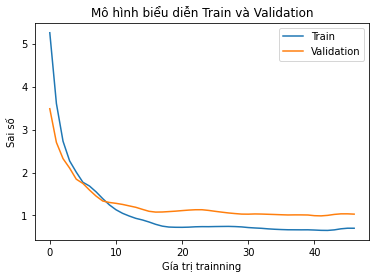

In [ ]:
# predict
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mô hình biểu diễn Train và Validation')
plt.ylabel('Sai số')
plt.xlabel('Gía trị trainning')
plt.legend(['Train','Validation'])
plt.show